In [21]:
import numpy as np
from sklearn.datasets import fetch_mldata
import pandas as pd
%matplotlib notebook

In [22]:
mnist = fetch_mldata("MNIST original")
X_ = mnist.data / 255.0
y_ = mnist.target

In [23]:
print(X_.shape, y_.shape)

(70000, 784) (70000,)


In [24]:
rndperm = np.random.permutation(X_.shape[0])

In [25]:
N_ = X_.shape[0]
X_train = X_[rndperm][:int(0.7*N_)]
y_train = y_[rndperm][:int(0.7*N_)].reshape(-1,1)

X_cv = X_[rndperm][int(0.7*N_):int(0.85*N_)]
y_cv = y_[rndperm][int(0.7*N_):int(0.85*N_)].reshape(-1,1)

X_test = X_[rndperm][int(0.85*N_):N_]
y_test = y_[rndperm][int(0.85*N_):N_].reshape(-1,1)

print("Train: ", np.shape(X_train), " ", np.shape(y_train))
print("Cross-Validation: ", np.shape(X_cv), " ", np.shape(y_cv))
print("Test: ", np.shape(X_test), " ", np.shape(y_test))

Train:  (49000, 784)   (49000, 1)
Cross-Validation:  (10500, 784)   (10500, 1)
Test:  (10500, 784)   (10500, 1)


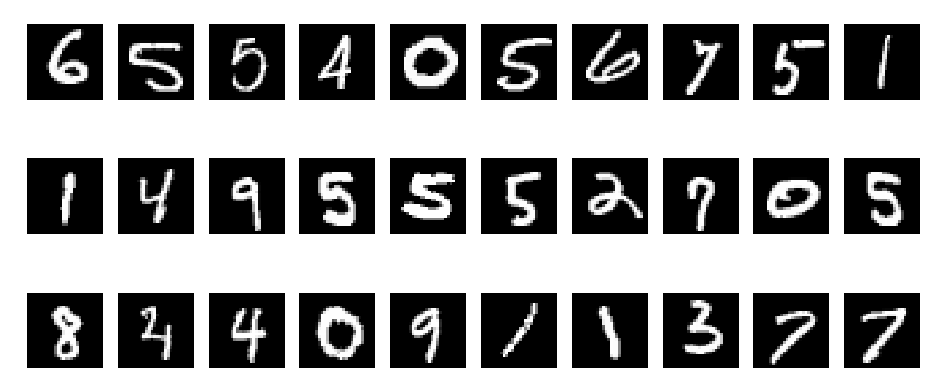

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1)
    ax.matshow(X_train[i].reshape((28,28)).astype(float))
    ax.axis("off")
plt.show()

In [27]:
from scipy import stats
class kNNModel:
    def __init__(self, X, y, k=5):
        self.k = k
        self.X = X
        self.y = y
        
    def distanceMatrix(self, T):
        M, _ = np.shape(self.X)
        L, _ = np.shape(T)
        X2 = np.sum(self.X**2, axis=1).reshape(-1,1)
        T2 = np.sum(T**2, axis=1).reshape(-1,1)
        TX = T.dot(self.X.T)
        dm = T2 - 2*TX + X2.T
        return dm
    
    def predict(self, T, dm=None, k=None):
        if dm is None:
            dm = self.distanceMatrix(T)
        if k is None:
            k = self.k
        indices = np.argsort(dm, axis=1)[:,:k]
        return stats.mode(self.y[indices], axis=1).mode.reshape(-1,1)
    
    def accuracy(self, T, l, dm=None, k=None):
        p = self.predict(T, dm, k)
        return np.mean(p==l)

In [28]:
model = kNNModel(X_train, y_train, 6)
accu = model.accuracy(X_cv[:5], y_cv[:5], None, 2)
print(accu)

1.0


In [29]:
accuL = []
Ks = list(range(1,10))
dm = model.distanceMatrix(X_cv[:1000])
for k in Ks:
    print("k =", k)
    accu = model.accuracy(X_cv[:1000], y_cv[:1000], dm, k)
    accuL.append(accu)
print(accuL)

k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
[0.97599999999999998, 0.96699999999999997, 0.97099999999999997, 0.96599999999999997, 0.96499999999999997, 0.96999999999999997, 0.96799999999999997, 0.96899999999999997, 0.96699999999999997]


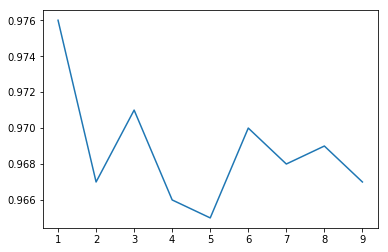

In [30]:
%matplotlib inline
plt.plot(Ks, accuL)
plt.show()

In [31]:
# Check with normalized data
def normalize(a):
    a_min = np.min(a, axis=1).reshape(-1,1)
    a_max = np.max(a, axis=1).reshape(-1,1)
    return (a-a_min)/(a_max - a_min + 1e-8)
nX_train = normalize(X_train)

nX_cv = normalize(X_cv)

nX_test = normalize(X_test)

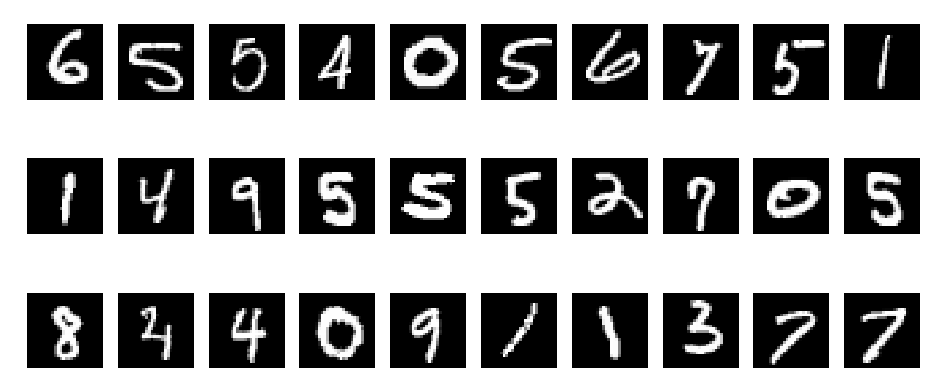

In [32]:
%matplotlib inline
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1)
    ax.matshow(nX_train[i].reshape((28,28)).astype(float))
    ax.axis("off")
plt.show()

In [33]:
model = kNNModel(nX_train, y_train, 6)
accu = model.accuracy(nX_cv[:5], y_cv[:5], None, 5)
print(accu)

1.0


In [34]:
accuL = []
Ks = list(range(1,10))
dm = model.distanceMatrix(nX_cv[:1000])
for k in Ks:
    print("k =", k)
    accu = model.accuracy(nX_cv[:1000], y_cv[:1000], dm, k)
    accuL.append(accu)
print(accuL)

k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
[0.97599999999999998, 0.96699999999999997, 0.97099999999999997, 0.96599999999999997, 0.96499999999999997, 0.96999999999999997, 0.96699999999999997, 0.96899999999999997, 0.96699999999999997]


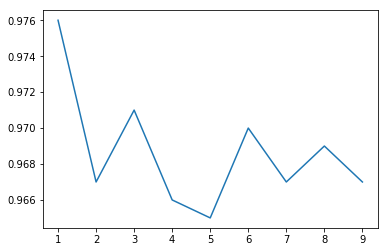

In [35]:
%matplotlib inline
plt.plot(Ks, accuL)
plt.show()

In [36]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
pca_result = pca.fit_transform(X_train[:5000])
print(np.sum(pca.explained_variance_ratio_))

0.917195568585


In [37]:
pX_train = pca.transform(X_train)

pX_cv = pca.transform(X_cv)

pX_test = pca.transform(X_test)

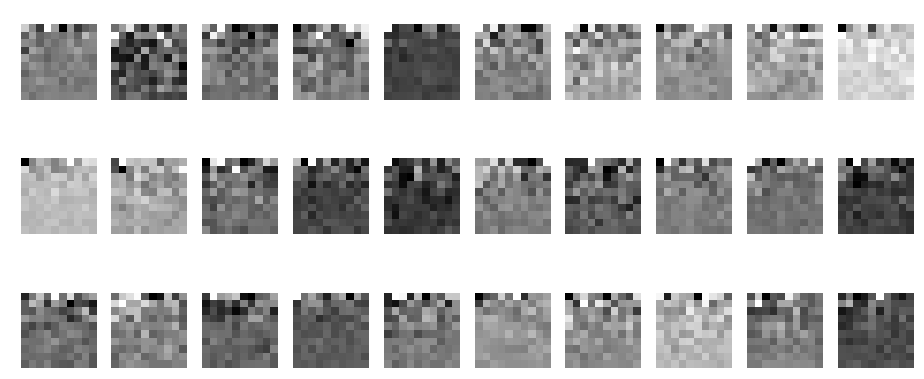

In [38]:
%matplotlib inline
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1)
    ax.matshow(pX_train[i].reshape((10,10)).astype(float))
    ax.axis("off")
plt.show()

In [39]:
model = kNNModel(pX_train, y_train, 6)
accu = model.accuracy(pX_cv[:5], y_cv[:5], None, 5)
print(accu)

1.0


In [40]:
accuL = []
Ks = list(range(1,10))
dm = model.distanceMatrix(pX_cv[:1000])
for k in Ks:
    print("k =", k)
    accu = model.accuracy(pX_cv[:1000], y_cv[:1000], dm, k)
    accuL.append(accu)
print(accuL)

k = 1
k = 2
k = 3
k = 4
k = 5
k = 6
k = 7
k = 8
k = 9
[0.98099999999999998, 0.97299999999999998, 0.97399999999999998, 0.97199999999999998, 0.97299999999999998, 0.97299999999999998, 0.97099999999999997, 0.97199999999999998, 0.97199999999999998]


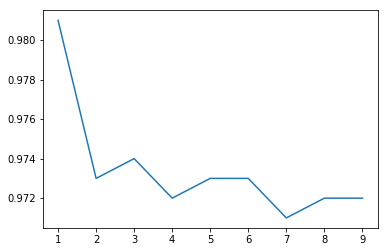

In [42]:
%matplotlib inline
plt.plot(Ks, accuL)
plt.show()

(10, 784)


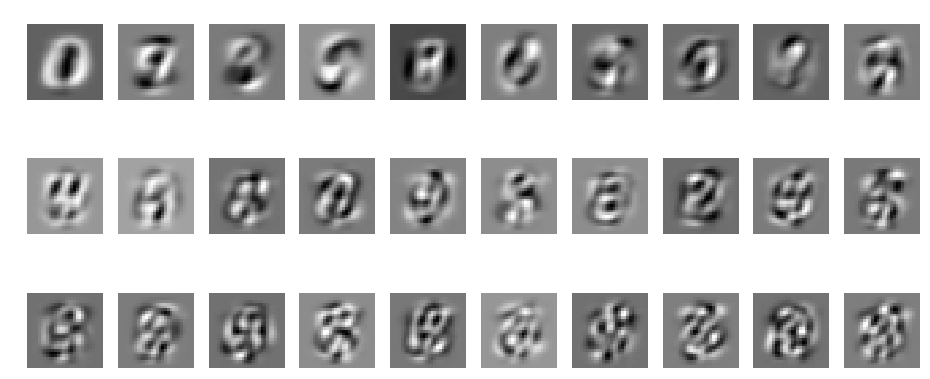

In [49]:
print(np.shape(pca.components_[:10]))
%matplotlib inline
# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1)
    ax.matshow(pca.components_[i].reshape((28,28)).astype(float))
    ax.axis("off")
plt.show()